In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']
# lists of words to use

In [3]:
positive_words = []
with open("positive_words.txt") as pos_f:

    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())
            
            negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())
           # print(lin)

In [4]:
def strip_punctuation(string):
    for char in string:
        if char in punctuation_chars:
            string = string.replace(char,'')   
    return(string)

In [5]:
def get_pos(sen):
    sen = strip_punctuation(sen).lower().split()
    j = 0
    for k in sen:
        if k in positive_words:
            j += 1
    return j

def get_neg(sen):
    sen = strip_punctuation(sen).lower().split()
    j = 0
    for n in sen:
        if n in negative_words:
            j += 1
    return j

In [12]:
# writing the 'Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score' into the resulting_data.csv file
twf = open('project_twitter_data.csv','r') 

next(twf, None)

with open("resulting_data0.csv", "w") as nf:
    nf.write('Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score')
    nf.write("\n") 
    
    for line in twf:

        line = line.strip()
        if not line:
            continue
        linelst = line.split(",")
        RT = linelst[1]
        RP = linelst[2]
        pos = get_pos(line)
        neg = get_neg(line)
        net = get_pos(line) - get_neg(line)
        rows = "{}, {}, {}, {}, {}".format(RT,RP,pos,neg,net)
        nf.write(rows + "\n")
#        print(rows)
twf.close()

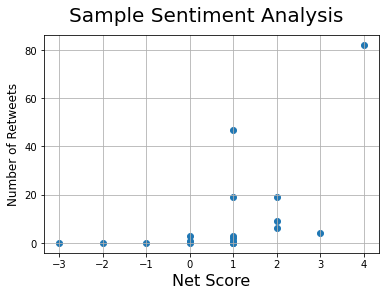

In [13]:
df = pd.read_csv('resulting_data0.csv', index_col=False, header=0)

fig = plt.figure()
plt.scatter(df['Net Score'], df['Number of Retweets']) 
fig.suptitle('Sample Sentiment Analysis', fontsize=20)
plt.xlabel('Net Score', fontsize=16)
plt.ylabel('Number of Retweets', fontsize=12)
plt.grid()